<a href="https://colab.research.google.com/github/Rohith-Rongali/EE5179-2023/blob/main/Tutorials/Tutorial-1/Tutorial1_Lin_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
print(np.__version__)
import matplotlib.pylab as plt

1.23.5


# Linear Regression

you will train 1D linear regresion model with PyTorch by using data that you created. <br>The model has two parameters: the slope `x` and bias `b`.

Model: $ y = wx+b $

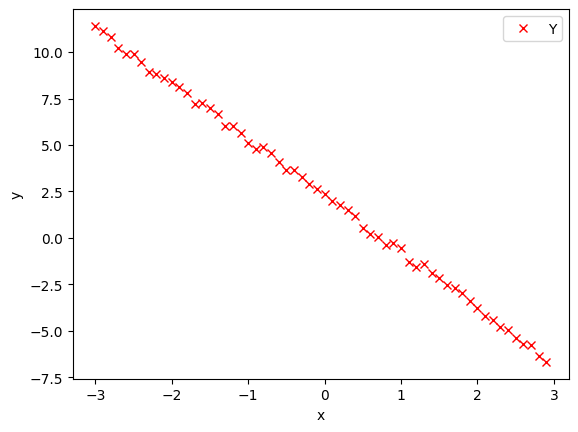

In [2]:
# Create the f(X) with a slope of -3
X = np.arange(-3, 3, 0.1)
f = -3 * X + 2
# Add some noise to f(X) and save it in Y
Y = f + 0.5 * np.random.rand(len(X))

# Plot the data points

plt.plot(X,Y, 'rx', label = 'Y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Your Task** (Step 1):  Initialize Model: $w=2,b=-1$


In [3]:
w=2.0
b=-1.0

**Your Task** (Step 2): Define the function <code>forward(x, w, b)</code> makes the prediction as $y=wx+b$

In [4]:
def forward(x,w,b):
    # YOUR CODE STARTS HERE
    yhat = w*x+b
    # YOUR CODE ends HERE
    return yhat

# test: Try to make the prediction for multiple inputs: x1=1.0 and x2=2.0
x = np.array([[1.0], [2.0]])
yhat = forward(x,w,b)
print("The prediction: ", yhat)

assert yhat[0] == 1 # at x=1, predicted value should be 1
assert yhat[1] == 3 # at x=2, predicted value should be 3

The prediction:  [[1.]
 [3.]]


**Your Task** (Step 3): Define the cost or criterion function using MSE (Mean Square Error):

In [5]:
# Create the MSE function for evaluate the result.
def criterion(yhat, y):
    # YOUR CODE STARTS HERE
    loss = 0
    for i in range(len(y)):
      loss+=(yhat[i]-y[i])**2
    # YOUR CODE ends HERE
    return loss/(len(y))

# test cases:
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])
loss = criterion(y_pred,y_true)

assert loss.item() == 0.375

**Your Task** (Step 4): Train your model

In [6]:
# Define a function for train the model
LOSS = []
def train_model(iter,w_init,b_init):
    w= w_init
    b= b_init
    for epoch in range(iter):

        # YOUR CODE STARTS HERE
        # make the prediction as we learned in the last lab
        # input data: X
        yhat=[]
        for x in X:
          yhat.append(forward(x,w,b))
        # calculate the loss between prediction Yhat and GT Y
        loss=criterion(yhat,Y)

        # store the loss into list
        LOSS.append(loss)
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        w_grad=0
        b_grad=0
        i=0
        for x in X:
          w_grad+=(w*x+b-Y[i])*x
          b_grad+=(w*x+b-Y[i])
          i+=1
        w_grad=(2*w_grad)/len(X)
        b_grad=(2*b_grad)/len(X)
        # updata parameters with learnign rate alpha=0.01
        alpha=0.001
        w = w - alpha * w_grad
        b = b - alpha * b_grad

        # YOUR CODE ENDS HERE
    return w,b



In [ ]:
yhat.shape

(2, 1)

In [ ]:
b

-1.0

Text(47.097222222222214, 0.5, 'Cost')

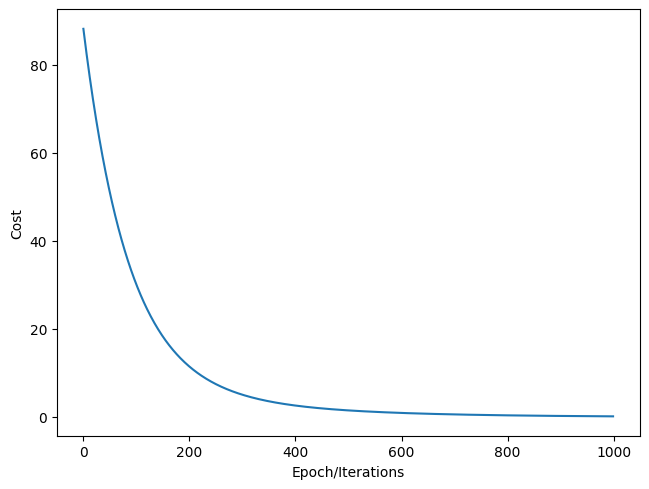

In [7]:
w_final,b_final = train_model(1000,w,b)

# Plot the loss for each iteration

plt.plot([x for x in LOSS])
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

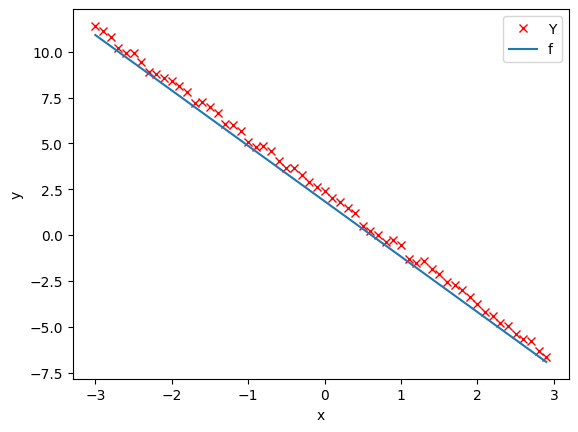

In [8]:
# Plot the data points
plt.plot(X, Y, 'rx', label = 'Y')
y_pred = forward(X,w_final,b_final)
plt.plot(X, y_pred, label = 'f')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [9]:
print(f'True parameters: w=-3 and b=2')
print(f'Predicted parameters: w={w_final} and b={b_final}')

True parameters: w=-3 and b=2
Predicted parameters: w=-3.0211608285624245 and b=1.8465366413440465
